In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):


  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

In [ ]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt

def draw_points_on_image(rgb_image, detection_result):
    # Copy the input image to avoid modifying the original.
    annotated_image = np.copy(rgb_image)

    # Extract the face landmarks list from the detection result.
    face_landmarks_list = detection_result.face_landmarks

    # Loop through the detected faces to visualize.
    for idx, face_landmarks in enumerate(face_landmarks_list):
        # Convert the face landmarks to the expected protobuf format.
        face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        face_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
        ])

        # Draw only the landmarks without any connections.
        solutions.drawing_utils.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks_proto,
            connections=None,  # No connections means only points are drawn.
            landmark_drawing_spec=solutions.drawing_utils.DrawingSpec(color=(255, 0, 0), thickness=1, circle_radius=1),
            connection_drawing_spec=None  # No need to specify connection style when not drawing connections.
        )

    return annotated_image


In [ ]:
# STEP 1: Import the necessary modules.
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("IMG_3760.JPG")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [ ]:
annotated_image = draw_points_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [ ]:
detection_result

FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.607505202293396, y=0.4706999957561493, z=-0.018194502219557762, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.590857207775116, y=0.4755244255065918, z=-0.03640570119023323, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5971463322639465, y=0.474382221698761, z=-0.019219085574150085, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5632876753807068, y=0.4819403886795044, z=-0.027961913496255875, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.582645833492279, y=0.4752151370048523, z=-0.0386827327311039, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5720599293708801, y=0.4748260974884033, z=-0.03592751920223236, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5454269647598267, y=0.4727306365966797, z=-0.017831111326813698, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5349849462509155, y=0.5365880727767944, z=0.0044054132886230946, visibility=0.0, presence=0.0), NormalizedLandmark

## Extend Eyes

In [ ]:
import cv2
import numpy as np
from mediapipe import solutions

def enlarge_eyes(image, detection_result, scale=1.5):
    annotated_image = np.copy(image)
    h, w, _ = image.shape
    eyes = []

    for face_landmarks in detection_result.face_landmarks:
        # Extract eye landmarks (for MediaPipe Face Mesh: 474 to 479 are left eye, 469 to 474 are right eye)
        left_eye = [(int(landmark.x * w), int(landmark.y * h)) for landmark in face_landmarks[474:480]]
        right_eye = [(int(landmark.x * w), int(landmark.y * h)) for landmark in face_landmarks[469:475]]
        eyes.extend([left_eye, right_eye])

    for eye in eyes:
        # Compute the bounding box for the eye
        xs, ys = zip(*eye)
        x1, y1, x2, y2 = min(xs), min(ys), max(xs), max(ys)
        eye_img = annotated_image[y1:y2, x1:x2]

        # Resize the eye region to enlarge it
        eye_img = cv2.resize(eye_img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
        expanded_h, expanded_w, _ = eye_img.shape

        # Calculate the new bounding box after enlargement
        ex1, ey1 = x1 - (expanded_w - (x2 - x1)) // 2, y1 - (expanded_h - (y2 - y1)) // 2

        # Ensure the new bounding box is within image bounds
        ex1, ey1 = max(ex1, 0), max(ey1, 0)
        ex2, ey2 = ex1 + expanded_w, ey1 + expanded_h

        # Place the resized eye back, blend for smoothness
        annotated_image[ey1:ey2, ex1:ex2] = cv2.addWeighted(annotated_image[ey1:ey2, ex1:ex2], 0.1, eye_img[:ey2-ey1, :ex2-ex1], 0.9, 0)

    return annotated_image

# Example usage
cap = cv2.VideoCapture(0)
with solutions.face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    min_detection_confidence=0.5) as face_mesh:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break

        # Convert the BGR image to RGB.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image and get the face landmarks.
        results = face_mesh.process(image)

        # Draw the face landmarks on the image.
        if results.multi_face_landmarks:
            image = enlarge_eyes(image, results, scale=1.3)

        # Show the image
        cv2.imshow('Enlarged Eyes', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
        if cv2.waitKey(5) & 0xFF == 27:
            break

cap.release()


In [ ]:
annotated_image = enlarge_eyes(image.numpy_view(), detection_result, scale = 2)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

## Face box detection

In [ ]:
for k in range(len(detection_result.face_landmarks[0])):
  if detection_result.face_landmarks[0][k].visibility== 0.0:
              print('ok')
              break

ok


In [ ]:
from typing import Tuple, Union
import math
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def _normalized_to_pixel_coordinates(
    normalized_x: float, normalized_y: float, image_width: int,
    image_height: int) -> Union[None, Tuple[int, int]]:
  """Converts normalized value pair to pixel coordinates."""

  # Checks if the float value is between 0 and 1.
  def is_valid_normalized_value(value: float) -> bool:
    return (value > 0 or math.isclose(0, value)) and (value < 1 or
                                                      math.isclose(1, value))

  if not (is_valid_normalized_value(normalized_x) and
          is_valid_normalized_value(normalized_y)):
    # TODO: Draw coordinates even if it's outside of the image bounds.
    return None
  x_px = min(math.floor(normalized_x * image_width), image_width - 1)
  y_px = min(math.floor(normalized_y * image_height), image_height - 1)
  return x_px, y_px


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes and keypoints on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  annotated_image = image.copy()
  height, width, _ = image.shape

  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y - 100
    end_point = bbox.origin_x + bbox.width , bbox.origin_y + bbox.height
    cv2.rectangle(annotated_image, start_point, end_point, TEXT_COLOR, 20)

    # Draw keypoints
    # for keypoint in detection.keypoints:
    #   keypoint_px = _normalized_to_pixel_coordinates(keypoint.x, keypoint.y,
    #                                                  width, height)
    #   color, thickness, radius = (0, 255, 0), 2, 2
    #   cv2.circle(annotated_image, keypoint_px, thickness, color, radius)

    # # Draw label and score
    # category = detection.categories[0]
    # category_name = category.category_name
    # category_name = '' if category_name is None else category_name
    # probability = round(category.score, 2)
    # result_text = category_name + ' (' + str(probability) + ')'
    # text_location = (MARGIN + bbox.origin_x,
    #                  MARGIN + ROW_SIZE + bbox.origin_y)
    # cv2.putText(annotated_image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
    #             FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return annotated_image

In [ ]:
!wget -q -O detector.tflite -q https://storage.googleapis.com/mediapipe-models/face_detector/blaze_face_short_range/float16/1/blaze_face_short_range.tflite


In [ ]:
# STEP 1: Import the necessary modules.
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceDetector object.
base_options = python.BaseOptions(model_asset_path='detector.tflite')
options = vision.FaceDetectorOptions(base_options=base_options)
detector = vision.FaceDetector.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("IMG_3760.JPG")

# STEP 4: Detect faces in the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_annotated_image)

In [ ]:
from PIL import Image
rgb_annotated_image = rgb_annotated_image[:, :, [0, 2, 1]]
im = Image.fromarray(annotated_image)
im.save("detection.jpg")

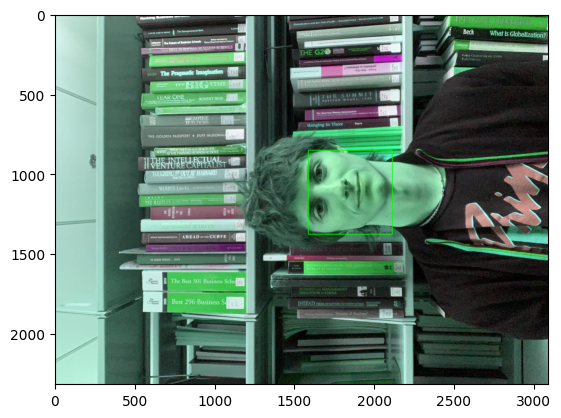

In [ ]:
plt.imshow(annotated_image)